# Data Exploration Exercises

##

The data for this homework assignment is sourced from the UCI Machine Learning Repository. This [link](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) includes a brief description of all columns (features) available this dataset. You can download this data set from BlackBoard under the `Data` folder to your local computer and then read those files into Python. 

Answer the following questions based on this dataset. Submit a Jupyter Notebook that contains all your code that you used to answer these questions. You can post your submission on Canvas or via email (patelvj2@vcu.edu). The Jupyter Notebook must be fully executable with no/minimal changes (such as the location of the input file).

In [60]:
%config IPCompleter.greedy=True

**Load Data**

In [5]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"../data/winequality.csv", encoding='ISO-8859-2')
                 
df.info()
df.head()

df = df.drop('Unnamed: 0', 1)


df_numeric = df.select_dtypes(include = ['float64', 'int64'])
df_cols = df_numeric.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  wine type             6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


**1. Plot histograms for all variables in this data set. Add a vertical line to show the average value of each variable. Add a chart title for each chart.**

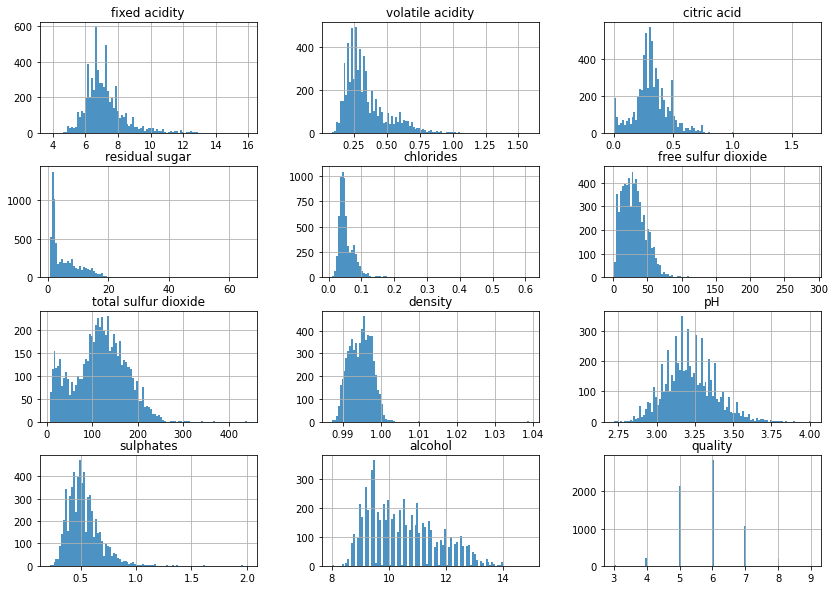

In [4]:
result  = df.hist(bins=100, alpha=0.8, figsize=(14, 10))


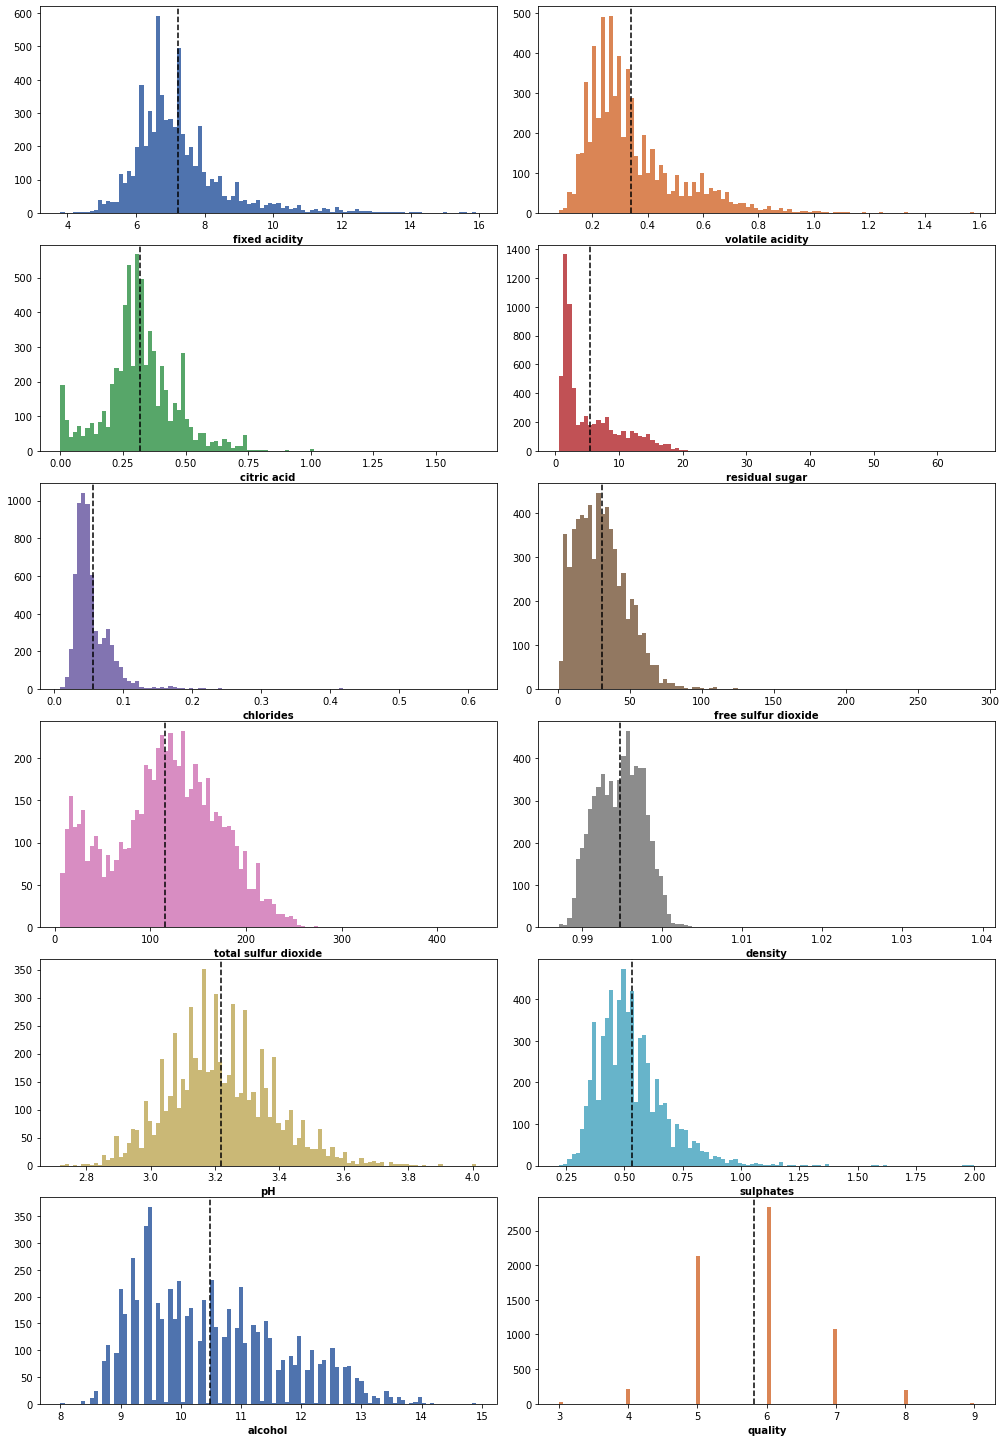

In [18]:
sns.set_palette("deep", 12, .95)
fig, axes = plt.subplots(nrows = 6, 
                         ncols = 2, 
                         figsize = (14, 20))

fig.tight_layout()

for i, ax in enumerate(axes.flat):
    col = df_cols[i]
    df[col].hist(bins = 100, grid = False, ax = ax, color = sns.color_palette()[i])
    ax.axvline(df[col].mean(), color = 'black', linestyle = 'dashed')
    ax.set_xlabel(col, weight = 'bold', size = 10)

**2. Identify two features that are most correlated with each other. Visualize their relationship using an appropriate chart type.**

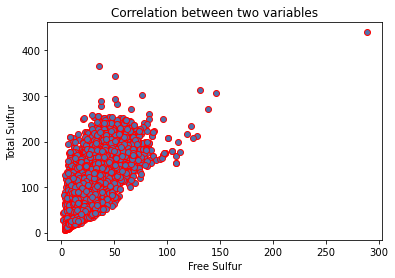

In [19]:
df.corr()
##Free Sulfur dioxide and total sulfur dioxide 

plt.scatter(df['free sulfur dioxide'], df['total sulfur dioxide'] , edgecolors='r')
plt.xlabel('Free Sulfur')
plt.ylabel('Total Sulfur')
plt.title('Correlation between two variables')
plt.show()

**3. Identify the feature that is most correlated with the wine quality and plot their relationship using an appropriate chart type.**

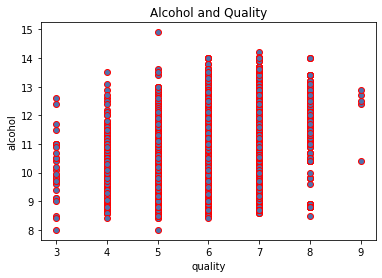

In [21]:
df.corr()

## Alcohol is most correlated with wine quality, who would have thunk?

plt.scatter(df['quality'], df['alcohol'] , edgecolors='r')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.title('Alcohol and Quality')
plt.show()


**4. Calcuate average alcohol content for each wine quality score. Store the average alcohol content for the best quality wine in a variable called `avg_alcohol_for_best_wine` and print it using the following statement:**

`print(f'The average alcohol content for the best wine is {avg_alcohol_for_best_wine}.')`

In [59]:
avg_alch_content = pd.DataFrame(df.groupby('quality')['alcohol'].mean())

print(f'The average alcohol content for the best wine is {avg_alch_content.max()[0]}')


The average alcohol content for the best wine is 12.18


**5. Calculate correlation coefficients between wine quality and all other features _separately for each wine type_. Identify any one feature that has contradictory relationships across the wine type. (For example, a feture has positive correlation with the wine quality for red wines, and negative correlation coefficients with the wine quality of white wines.)**

**Plot the relationship of the selected feature with wine quality using an appropriate chart type.**

In [74]:
reds_only = df.loc[df['wine type'] == 'Red']

white_only = df.loc[df['wine type'] == 'White']

white_only.corr()

##Fixed acidity has a positive correlation with reds and negative with whites

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [73]:
reds_only.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


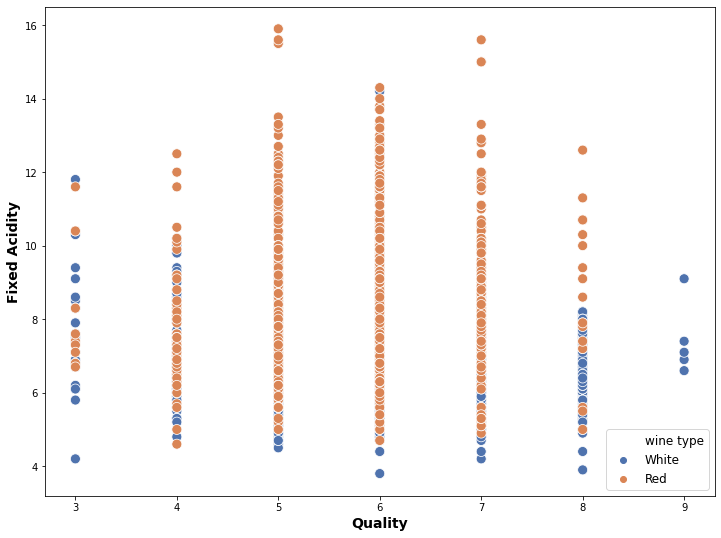

In [77]:
plt.figure(figsize=[12, 9])

ax = sns.scatterplot(x='quality', y='fixed acidity', data=df, color='tomato', s=100, hue='wine type')

plt.xlabel('Quality', fontsize=14, weight='bold')
plt.ylabel('Fixed Acidity', fontsize=14, weight='bold')
plt.legend(loc='lower right', fontsize=12);

**6. Create a dataframe (see example below) that contains one the overall average for each variable as well as its average value for Red and White wines. Divide both averages by the overall average to create an index for each variable. Multiply the index columns by 100. Which two variables have the highest index?**

|                 | Red      | White    | Overall  | White_Index | Red_Index  |
|-----------------|----------|----------|----------|-------------|------------|
|fixed acidity	  | 8.319637 | 6.854788 | 7.215307 | 95.003409   | 115.305381 |
|volatile acidity |	0.527821 | 0.278241	| 0.339666 | 81.916094   | 155.3939   |
|.................|..........|..........|..........|.............|............|

In [206]:
df_avg_types = df.groupby('wine type').mean().T

df_avg_types['Overall'] = df.mean(axis = 0)

df_avg_types['White_Index'] = df_avg_types['White']/df_avg_types['Overall'] * 100

df_avg_types['Red_Index'] = df_avg_types['Red']/df_avg_types['Overall'] * 100

print(df_avg_types)

wine type                   Red       White     Overall  White_Index  \
fixed acidity          8.319637    6.854788    7.215307    95.003409   
volatile acidity       0.527821    0.278241    0.339666    81.916094   
citric acid            0.270976    0.334192    0.318633   104.882822   
residual sugar         2.538806    6.391415    5.443235   117.419411   
chlorides              0.087467    0.045772    0.056034    81.686956   
free sulfur dioxide   15.874922   35.308085   30.525319   115.668192   
total sulfur dioxide  46.467792  138.360657  115.744574   119.539648   
density                0.996747    0.994027    0.994697    99.932717   
pH                     3.311113    3.188267    3.218501    99.060612   
sulphates              0.658149    0.489847    0.531268    92.203299   
alcohol               10.422983   10.514267   10.491801   100.214131   
quality                5.636023    5.877909    5.818378   101.023166   
wine_quality_binary    1.000000    0.000000    0.246114     0.00

**7. Replace 'Red' with 1 and 'White' with 0 in the `wine quality` column. What percentage of all records in the dataset are for Red wines?**

In [95]:
df['wine_type_binary'] = df['wine type'].replace(['Red','White'],[1,0])

df.wine_type_binary.value_counts() / len(df) * 100


0    75.388641
1    24.611359
Name: wine_type_binary, dtype: float64